In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("fifa_eda.csv")

In [54]:
print(df.shape)


(18207, 18)


In [55]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [56]:
print(df.head())

       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    

In [57]:
print(df.isnull().sum())

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64


In [58]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       1.384083
Wage                        0.000000
Preferred Foot              0.000000
International Reputation    0.263635
Skill Moves                 0.263635
Position                    0.000000
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Release Clause              0.000000
dtype: float64


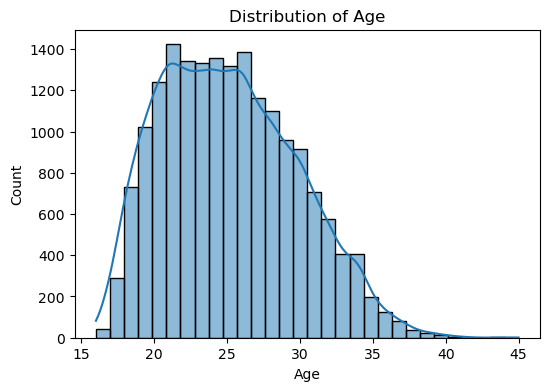

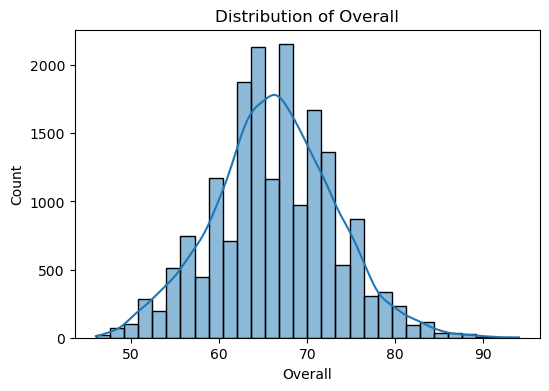

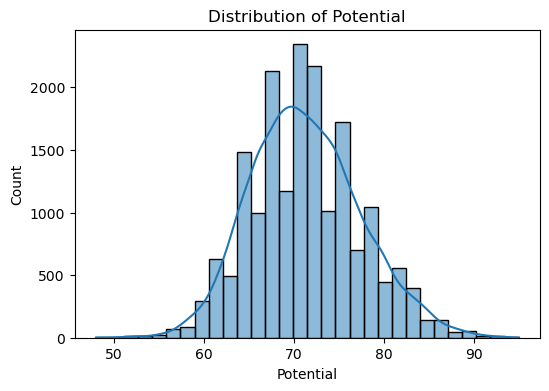

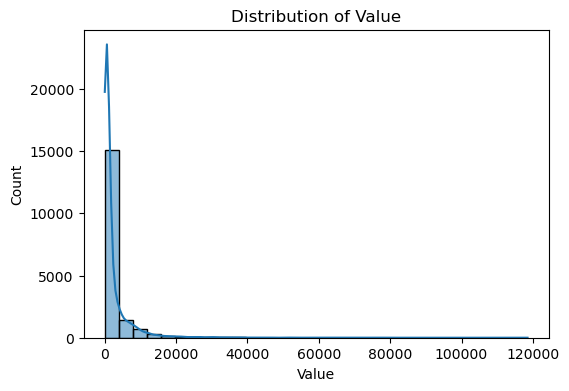

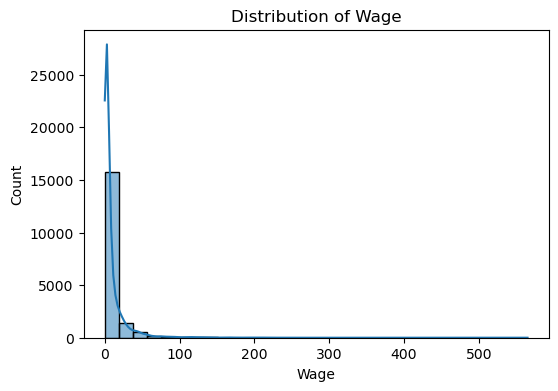

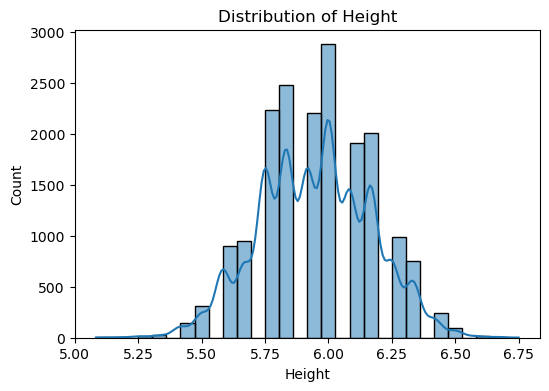

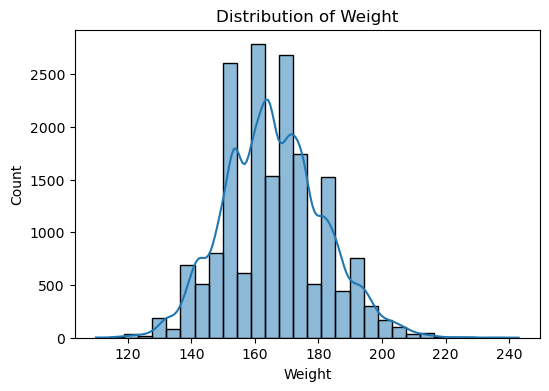

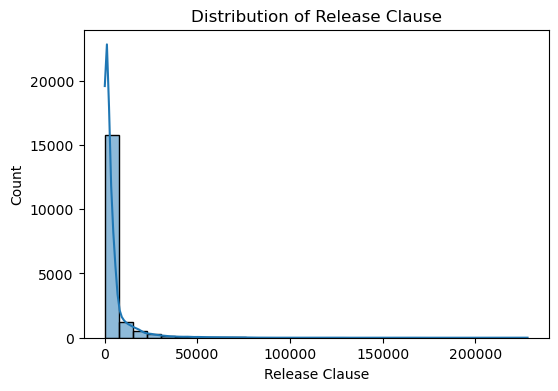

In [59]:
num_cols = ['Age','Overall','Potential','Value','Wage','Height','Weight','Release Clause']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


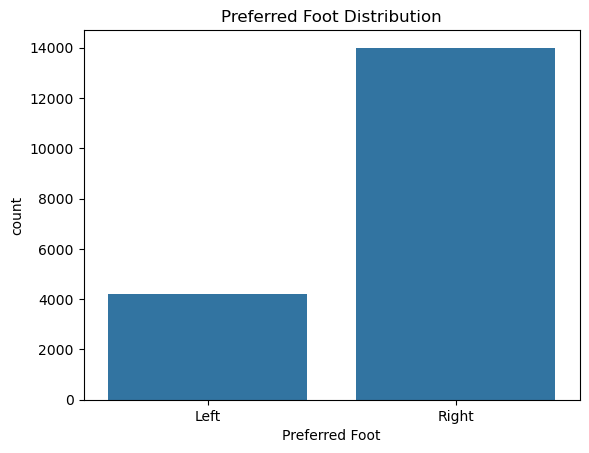

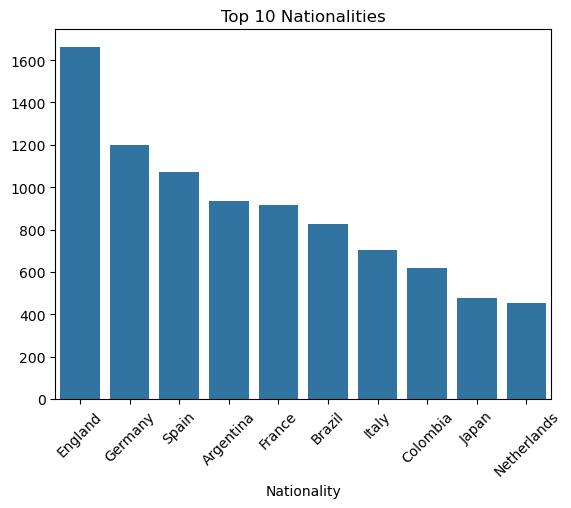

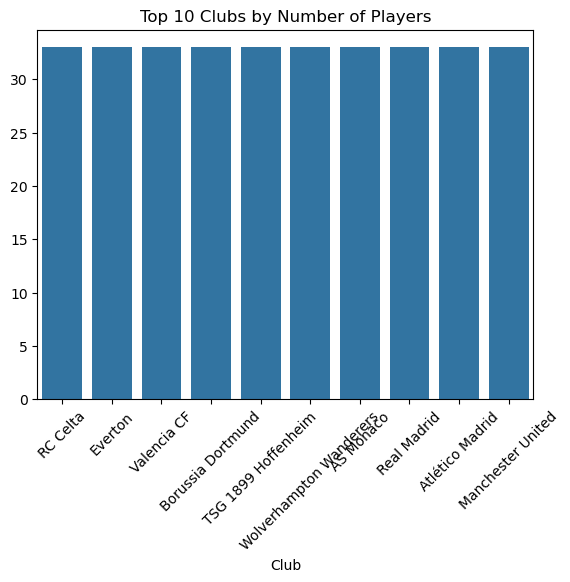

In [60]:
# Preferred Foot
sns.countplot(x='Preferred Foot', data=df)
plt.title("Preferred Foot Distribution")
plt.show()

# Top 10 Nationalities
top_nations = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nations.index, y=top_nations.values)
plt.xticks(rotation=45)
plt.title("Top 10 Nationalities")
plt.show()

# Top 10 Clubs
top_clubs = df['Club'].value_counts().head(10)
sns.barplot(x=top_clubs.index, y=top_clubs.values)
plt.xticks(rotation=45)
plt.title("Top 10 Clubs by Number of Players")
plt.show()


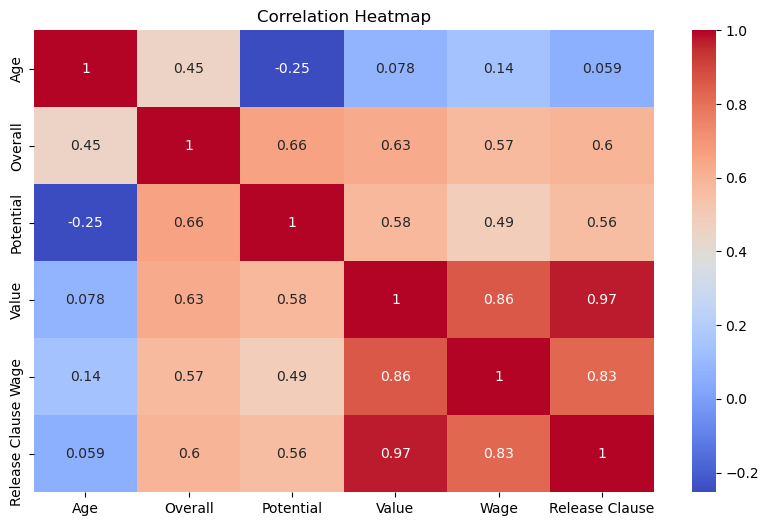

ValueError: Could not interpret value `Overall` for `x`. Value is a string, but `data` was not passed.

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age','Overall','Potential','Value','Wage','Release Clause']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter: Overall vs Value
sns.scatterplot(x='Overall', y=np.log1p(df['Value']), alpha=0.5)
plt.title("Overall vs Value (Log Scale)")
plt.show()

# Scatter: Wage vs Value
sns.scatterplot(x=np.log1p(df['Wage']), y=np.log1p(df['Value']), alpha=0.5)
plt.title("Wage vs Value (Log Scale)")
plt.show()


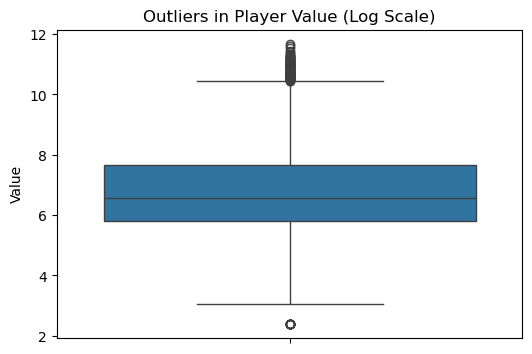

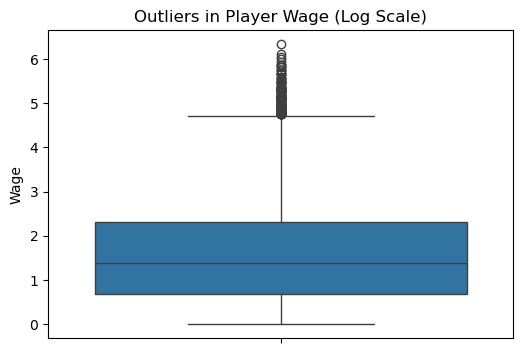

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(y=np.log1p(df['Value']))
plt.title("Outliers in Player Value (Log Scale)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=np.log1p(df['Wage']))
plt.title("Outliers in Player Wage (Log Scale)")
plt.show()


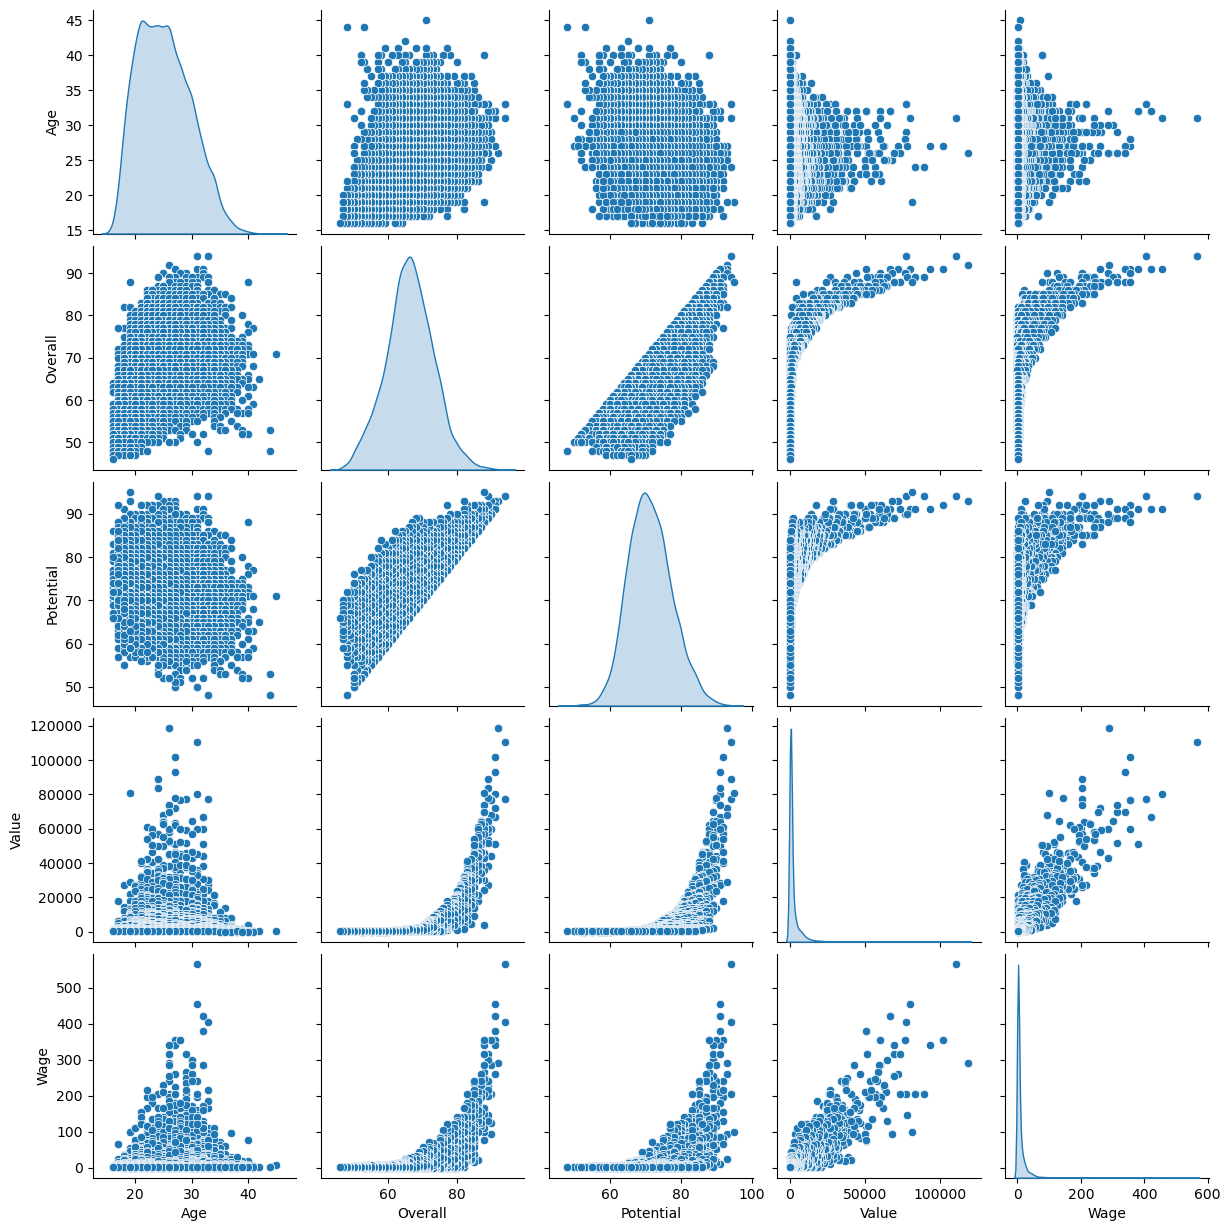

In [63]:
sns.pairplot(df[['Age','Overall','Potential','Value','Wage']], diag_kind="kde")
plt.show()
